In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
from scipy import stats
import math
from mplsoccer import PyPizza, add_image, FontManager

In [2]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

# Teams Scatter plot

In [3]:
df = pd.read_csv('Teams xG ISL.csv')

In [4]:
df = df[['Team','xG','Goals']]

In [5]:
df['path'] = df['Team'] + '.png'

Text(0.53, 0.17, 'Avg xG')

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


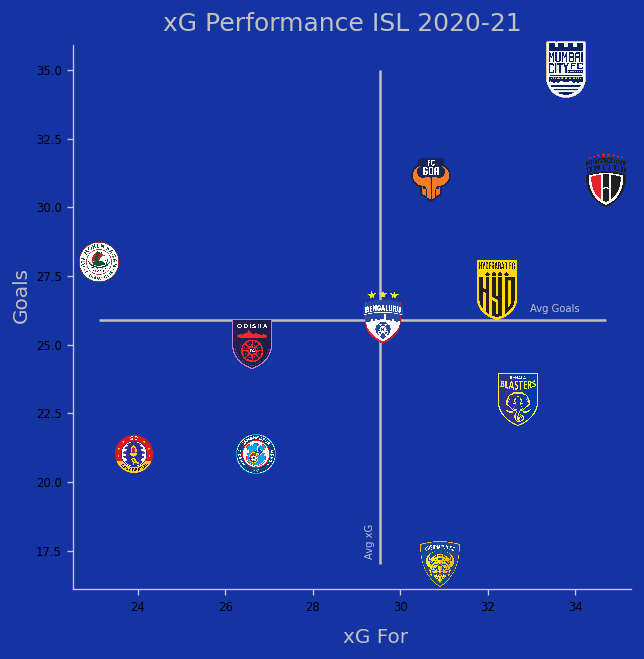

In [6]:
plt.rcParams.update({'font.family':'Avenir'})
bgcol = '#1434A4'

# Create initial plot
fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df['xG'], df['Goals'], c=bgcol)

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=7, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=7, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.02, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['xG'], row['Goals']), frameon=False)
    ax.add_artist(ab)

# Add average lines
plt.hlines(df['Goals'].mean(), df['xG'].min(), df['xG'].max(), color='#c2c1c0')
plt.vlines(df['xG'].mean(), df['Goals'].min(), df['Goals'].max(), color='#c2c1c0')

# Text

## Title & comment
fig.text(.25,.9,'xG Performance ISL 2020-21',size=15, color='#c2c1c0')


## Avg line explanation
fig.text(.04,.5,'Goals', size=12, color='#c2c1c0',rotation=90)
fig.text(.5,0.05,'xG For', size=12, color='#c2c1c0')

## Axes titles
fig.text(.76,.51,'Avg Goals', size=6, color='#c2c1c0')
fig.text(.53,.17,'Avg xG', size=6, color='#c2c1c0',rotation=90)

#fig.text(.76,.06,'@BhathenaJoyan', size=6, color='#c2c1c0')
#plt.savefig('ISL teams xG performance', dpi = 500)

# Player Visualisations

In [7]:
df = pd.read_csv('FULL INDIAN FOOTBALL MIDS DATA 2020-21.CSV')
#I split the dataset using filter in excel for ease of access

In [8]:
df.head()

,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,...,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 90.1,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %"
0,G. Hooper,Wellington Phoenix,Kerala Blasters,"CF, AMF",33.0,600000,30-06-2023,18,1496,5,...,NaN,0.00,NaN,NaN,0.06,0.00,0.0,0.36,2,100.0
1,H. Boumous,ATK Mohun Bagan Football Club,Mumbai City,"AMF, CF",26.0,575000,31-05-2026,16,1535,3,...,NaN,0.18,NaN,NaN,0.29,0.00,0.0,1.00,1,0.0
2,B. Enobakhare,Coventry City,East Bengal,"AMF, CF",23.0,550000,30-06-2023,12,1026,3,...,NaN,0.00,NaN,NaN,0.35,0.18,0.0,1.49,0,0.0
3,Vicente G�mez,NaN,Kerala Blasters,"LCMF, LDMF",32.0,550000,NaN,19,1866,2,...,NaN,1.01,NaN,NaN,0.14,0.10,0.0,0.10,0,0.0
4,M. Steinmann,Brisbane Roar,East Bengal,"LCMF, RCMF, AMF",26.0,500000,30-06-2022,17,1565,4,...,NaN,0.23,NaN,NaN,0.00,0.00,0.0,0.06,0,0.0


In [9]:
list(df.columns)

['Player',
 'Team',
 'Team within selected timeframe',
 'Position',
 'Age',
 'Market value',
 'Contract expires',
 'Matches played',
 'Minutes played',
 'Goals',
 'xG',
 'Assists',
 'xA',
 'Duels per 90',
 'Duels won, %',
 'Birth country',
 'Passport country',
 'Foot',
 'Height',
 'Weight',
 'On loan',
 'Successful defensive actions per 90',
 'Defensive duels per 90',
 'Defensive duels won, %',
 'Aerial duels per 90',
 'Aerial duels won, %',
 'Sliding tackles per 90',
 'PAdj Sliding tackles',
 'Shots blocked per 90',
 'Interceptions per 90',
 'PAdj Interceptions',
 'Fouls per 90',
 'Yellow cards',
 'Yellow cards per 90',
 'Red cards',
 'Red cards per 90',
 'Successful attacking actions per 90',
 'Goals per 90',
 'Non-penalty goals',
 'Non-penalty goals per 90',
 'xG per 90',
 'Head goals',
 'Head goals per 90',
 'Shots',
 'Shots per 90',
 'Shots on target, %',
 'Goal conversion, %',
 'Assists per 90',
 'Crosses per 90',
 'Accurate crosses, %',
 'Crosses from left flank per 90',
 'Accur

In [37]:
#create a datafram of the attributes you want to visualise
mid_df = (df[['Player',
 'Team',
 'Defensive duels won, %','Aerial duels won, %', 'Offensive duels won, %','PAdj Interceptions',
'Successful defensive actions per 90','Successful attacking actions per 90','Accurate forward passes, %', 'Accurate long passes, %',
'Accurate passes to final third, %','Accurate smart passes, %','Progressive passes per 90'
]])

In [38]:
params = list(mid_df.columns)[2:]

In [39]:
#find the player you want to visualise

In [40]:
mid_df.Player.values

array(['G. Hooper', 'H. Boumous', 'B. Enobakhare', 'Vicente G�mez',
       'M. Steinmann', 'C. Alexander', 'Jo�o Victor', 'R. Alberg', 'Alex',
       'Marcelinho', 'Cleiton Silva', 'Edu Bedia', 'Lu�s Machado',
       'A. Jahouh', 'Javi Hern�ndez', 'J. Maghoma', 'C. McHugh',
       'J. Chianese', 'F. Pereyra', 'N. Fitzgerald', 'Xisco Hern�ndez',
       'Edu Garc�a', 'Juande', 'B. Ogbeche', 'Cidoncha',
       'Alberto Noguera', 'Crivellaro', 'K. Camara', 'F. Gallego',
       'Jorge Ortiz', 'E. Paartalu', 'Bipin Singh', 'B. Fernandes',
       'L. Chhangte', 'J. Mawihmingthanga', 'F. Fatkhulloev', 'Memo',
       'R. Fernandes', 'Lluis Sastre', 'S. Singh', 'A. Amadi-Holloway',
       'M. Singh', 'S. Samad', 'K. Appiah', 'R. Borges', 'L. Ralte',
       'B. Inman', 'A. Thapa', 'N. Sekar', 'M. Yasir', 'L. Colaco',
       'H. Khabra', 'J. Singh', 'J. Thaunaojam', 'R. Tlang', 'H. Narzary',
       'P. Halder', 'M. Rahman', 'S. Vadakkepeedika', 'Aitor Monroy',
       'P. Rebello', 'A. Jesuraj', 'G

In [45]:
player = mid_df.loc[mid_df['Player']=='L. Ralte'].reset_index(0) #Apuia

In [46]:
player #make sure values are not NaN otherwise it will throw an error later

,index,Player,Team,"Defensive duels won, %","Aerial duels won, %","Offensive duels won, %",PAdj Interceptions,Successful defensive actions per 90,Successful attacking actions per 90,"Accurate forward passes, %","Accurate long passes, %","Accurate passes to final third, %","Accurate smart passes, %",Progressive passes per 90
0,45,L. Ralte,NorthEast United,66.44,51.11,53.70,5.44,8.39,1.25,76.96,62.96,78.70,14.29,5.98
1,194,L. Ralte,Real Kashmir,54.62,58.33,43.33,4.44,10.61,2.68,50.96,48.72,50.85,100.00,6.69


In [47]:
player = list(player.loc[0])
print(player)

[45, 'L. Ralte', 'NorthEast United', 66.44, 51.11, 53.7, 5.44, 8.39, 1.25, 76.96, 62.96, 78.7, 14.29, 5.98]


In [48]:
player = player[3:]
print(len(player),print(len(params)))

11
11 None


In [49]:
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [50]:
values

[77, 73, 81, 70, 68, 23, 83, 76, 84, 39, 65]

In [51]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

In [52]:
params

['Defensive duels won, %',
 'Aerial duels won, %',
 'Offensive duels won, %',
 'PAdj Interceptions',
 'Successful defensive actions per 90',
 'Successful attacking actions per 90',
 'Accurate forward passes, %',
 'Accurate long passes, %',
 'Accurate passes to final third, %',
 'Accurate smart passes, %',
 'Progressive passes per 90']

In [53]:
#rename the params to fit into the plot properly
params = ['DefDuelsWon%',
          'AerialDuelsWon%',
          'OffensiveDuelsWon%',
          'PAdjInterceptions',
          'SuccDefActionsp90',
          'SuccAttActionsp90',
          'AccForwardPasses%',
          'AccLongballs%',
          'AccPassestoFinal3rd%',
          'AccSmartPasses%',
          'ProgressivePassesp90'
         ]

In [25]:
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222", 
    straight_line_color="#FFFFFF",
    last_circle_color="#FFFFFF", 
    last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, 
    other_circle_color="#000000", 
    inner_circle_size=20
)

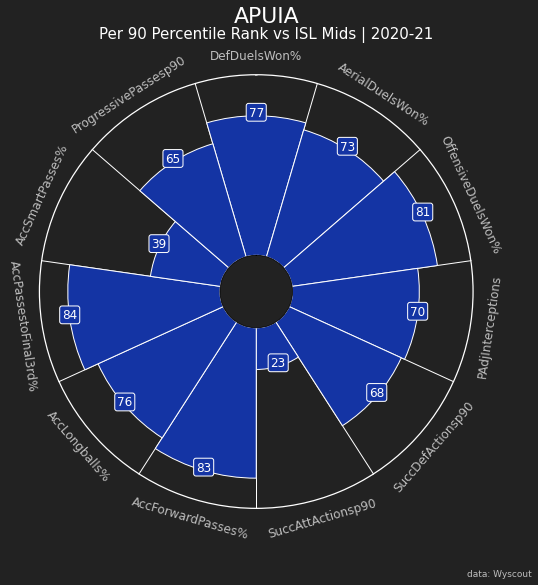

In [56]:
# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1434A4", edgecolor="#FFFFFF",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#FFFFFF", fontsize=12,
        va="center", alpha=.7
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#FFFFFF", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#FFFFFF", facecolor="#1434A4",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.53, 0.97, "APUIA", size=22,
    ha="center", color="#FFFFFF"
)

# add subtitle
fig.text(
    0.53, 0.942,
    "Per 90 Percentile Rank vs ISL Mids | 2020-21",
    size=15,
    ha="center", color="#FFFFFF"
)

# add credits
CREDIT_1 = "data: Wyscout"

fig.text(
    0.99, 0.009, f"{CREDIT_1}", size=9,
    color="#FFFFFF",
    ha="right", alpha = 0.7
)
 
plt.savefig('Apuia_pizza.png',dpi=300,bbox_inches = 'tight')